<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>Natural Language Processing (Spring 2023)</b><br><br>CA4-Q1</i></font></h1>
                </td>
                <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>
    
</div>
<br>
<font size=3 color="#045F5F">Parham Bicharanlu<br></font><br>
<font size=3 color="#045F5F">810100303<br></font><br>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Read and Preprocessing Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/NLP_CA4_Q1_dataset/Train-word.csv', sep='\t')
train_data

,premise,hypothesis,label
0,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,نخستین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی...,e
1,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,کانون های جغرافیایی مصر، اندلس و شام، نخستین ر...,c
2,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,سیسیل بعد از اسپانیا بزرگ ترین کانونی بود که ه...,n
3,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,نقاشی های تزئینی و تندیس های بی‌کیفیت، یکی از ...,e
4,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,با کیفیت بودن تندیس های دوره اموی، یکی از ویژگ...,c
...,...,...,...
7261,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,تعداد فصول قانون اساسی ۱۴ و تعداد اصول آن ۱۷۷ ...,e
7262,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,قانون اساسی دارای ۲۵ فصل و ۱۷۵ اصل می باشد.,c
7263,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,در ۲۴ آبان ۵۸ کار تدوین قانون اساسی به پایان ر...,n
7264,محاصره اقتصادی پیامبر (ص) و یارانش که در سال ه...,حضرت محمد (ص) و یارانش از ششمین سال بعثت تا هش...,c


In [4]:
valid_data = pd.read_csv('/content/drive/MyDrive/NLP_CA4_Q1_dataset/Val-word.csv', sep='\t')
valid_data

,premise,hypothesis,label
0,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,کتاب مگیستی (المجسطی) از آثار بطلمیوس است و از...,e
1,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,المجسطی (مگیستی)، یکی از کتاب های هرون از مکتب...,c
2,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,ترجمه المجسطی، پایه تهیه جداول نجومی گردید که ...,n
3,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,کتاب کلمات قصار یا فصول، اثر بقراط است.,e
4,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,جالینوس، نویسنده کتاب کلمات قصار بوده است.,c
...,...,...,...
1532,"فقط ۶ کشور قطر, عمان، کویت، امارات، بحرین و عر...","عراق از اعضای تشکیل دهنده ی ""شورای همکاری خلیج...",c
1533,"فقط ۶ کشور قطر, عمان، کویت، امارات، بحرین و عر...","ایجاد مراکز تحقیقاتی-علمی از اهداف ""شورای همکا...",n
1534,امام خمینی پنج هجرت مهم داشته اند که از قرار ز...,حضرت امام خمینی (ره) برای اولین بار به ترکیه ت...,e
1535,امام خمینی پنج هجرت مهم داشته اند که از قرار ز...,عراق اولین کشوری بود که امام خمینی به آن تبعید...,c


In [5]:
test_data = pd.read_csv('/content/drive/MyDrive/NLP_CA4_Q1_dataset/Test-word.csv', sep='\t')
test_data

,premise,hypothesis,label,hard(hypothesis),hard(overlap)
0,دوران امامت امام صادق علیه السلام، مصادف است ب...,امام سجاد (ع) در دورانی امامت کردند که همزمان ...,c,0,1
1,دوران امامت امام صادق علیه السلام، مصادف است ب...,دستگاه فاسد حکومتی با صرف هزینه های هنگفت، سعی...,n,1,0
2,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,دوران محنت اهل بیت پس از شهادت امام رضا(ع) آغا...,e,0,0
3,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,بعد از به شهادت رسیدن امام هادی(ع) دوران محنت ...,c,1,1
4,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,حضرت جواد(ع) در سال ۱۹۵ هجری در مدینه ولادت یافت.,n,1,0
...,...,...,...,...,...
1559,دریای خَزَر یا دریای مازَندَران یا (با رواج کم...,در حاشیه ی دریای خزر کشور آذربایجان وجود ندارد.,c,0,1
1560,دریای خَزَر یا دریای مازَندَران یا (با رواج کم...,جمهوری آذربایجان به ترکی آذربایجانی بزرگترین ک...,n,0,1
1561,اولین چاپ مطالب به زبان فارسی در روزنامه‌های ه...,اولین روزنامه فارسی در هند انتشار یافت.,e,1,0
1562,اولین چاپ مطالب به زبان فارسی در روزنامه‌های ه...,ایران نخستین روزنامه فارسی را چاپ کرد.,c,1,0


Visualizes the distribution of polarity labels.

<Axes: >

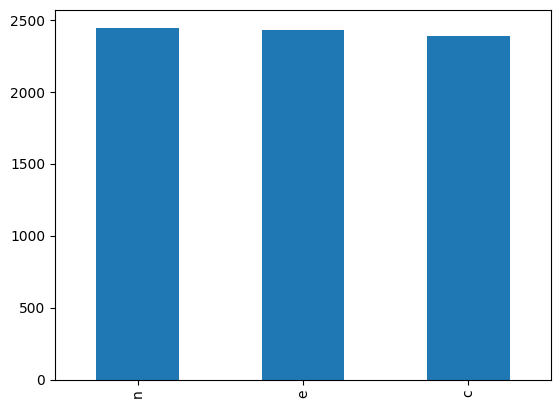

In [6]:
train_data['label'].value_counts().plot(kind='bar')

In [7]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 477.8/477.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 40.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [8]:
import re
from hazm import Normalizer, word_tokenize

In [9]:
er = ("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002500-\U00002BEF"  # chinese char
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642" 
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"  # dingbats
    u"\u3030"
     "]+")

Using hazm to Preproces comments. and after that remove emoticons, symbols, flgs and other unwanted characters.

In [10]:
punctuation = "?.؟!،,"
normalizer = Normalizer()
def preprocessing(item):
    output = normalizer.normalize(item)
    output = output.replace("\_", "\u200c")
#     output = output.replace("\u200c", "")
    output = re.sub(r"LINK([^ ])*|TAG|ID|\-|@|LINK|[A-Za-z]", "", output)
    for i in punctuation:
        p = "\\" + i + "{2,}"
        output = re.sub(p, i, output)
#     output = re.sub("\?|\.|\؟|\!|\،|\,", "", output)
    emoj = re.compile(er)
    #or i in emoj.findall(output):
        #allemojies.add(i)
    output = re.sub("\s+", " ", output).strip()
    return output

train_data['premise'] = train_data['premise'].apply(preprocessing)
train_data['hypothesis'] = train_data['hypothesis'].apply(preprocessing)


In [11]:
valid_data['premise'] = valid_data['premise'].apply(preprocessing)
valid_data['hypothesis'] = valid_data['hypothesis'].apply(preprocessing)

In [12]:
test_data['premise'] = test_data['premise'].apply(preprocessing)
test_data['hypothesis'] = test_data['hypothesis'].apply(preprocessing)

In [13]:
train_data

,premise,hypothesis,label
0,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,نخستین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی...,e
1,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,کانون‌های جغرافیایی مصر، اندلس و شام، نخستین ر...,c
2,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,سیسیل بعد از اسپانیا بزرگ‌ترین کانونی بود که ه...,n
3,ویژگی‌های هنر عصر اموی: ۱ تلفیقی بودن ۲ بازنما...,نقاشی‌های تزئینی و تندیس‌های بی‌کیفیت، یکی از ...,e
4,ویژگی‌های هنر عصر اموی: ۱ تلفیقی بودن ۲ بازنما...,با کیفیت بودن تندیس‌های دوره اموی، یکی از ویژگ...,c
...,...,...,...
7261,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,تعداد فصول قانون اساسی ۱۴ و تعداد اصول آن ۱۷۷ ...,e
7262,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,قانون اساسی دارای ۲۵ فصل و ۱۷۵ اصل می‌باشد.,c
7263,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,در ۲۴ آبان ۵۸ کار تدوین قانون اساسی به پایان ر...,n
7264,محاصره اقتصادی پیامبر (ص) و یارانش که در سال ه...,حضرت محمد (ص) و یارانش از ششمین سال بعثت تا هش...,c


In [14]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column with categorical labels

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the categorical column
train_data['label'] = label_encoder.fit_transform(train_data['label'])
valid_data['label'] = label_encoder.fit_transform(valid_data['label'])
test_data['label'] = label_encoder.fit_transform(test_data['label'])

In [15]:
train_data['label'][0]

1

In [16]:
train_data['label'][1]

0

In [17]:
train_data['label'][2]

2

In [18]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 123.6 MB/s eta 0:00:00


In [19]:
import pandas as pd
import numpy as np
import transformers
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
from torchsummary import summary
from tqdm import tqdm
from transformers import AutoConfig, AutoTokenizer, AutoModel


Prepares the dataset for training, validation, and testing by creating data loaders.

In [20]:
class ParsBertDataset(Dataset):
    def __init__(self,data, tokenizer,max_length):
        super(ParsBertDataset, self).__init__()
        #self.root_dir=root_dir
        self.train_csv= data
        self.tokenizer=tokenizer
        self.target=self.train_csv.iloc[:,1]
        self.max_length=max_length
        
    def __len__(self):
        return len(self.train_csv)
    
    def __getitem__(self, index):
        
        text1 = self.train_csv.iloc[index,0]
        text2 = self.train_csv.iloc[index,1]
        inputs = self.tokenizer.encode_plus(
            text1 ,
            text2,
            pad_to_max_length=True,
            add_special_tokens=True,
            return_attention_mask=True,
            max_length=self.max_length,
        )
        ids = inputs["input_ids"]
        token_type_ids = inputs["token_type_ids"]
        mask = inputs["attention_mask"]
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'target': torch.tensor(self.train_csv.iloc[index, 2], dtype=torch.long)
            }
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")



In [21]:
dataset = ParsBertDataset(train_data,tokenizer, max_length=100)
dataloader=DataLoader(dataset=dataset,batch_size=128,drop_last= True)

dataset_valid = ParsBertDataset(valid_data,tokenizer, max_length=100)
valid_dataloader= DataLoader(dataset=dataset_valid,batch_size=128,drop_last= True)

dataset_test = ParsBertDataset(test_data,tokenizer, max_length=100)
test_dataloader= DataLoader(dataset=dataset_test,batch_size=128,drop_last= True)

In [22]:
dataset.__getitem__(2)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


{'ids': tensor([    2,  3001,  3485,   331,  5021,  3673,  3251,   331,  8367,  2471,
          2031,  3509,  2036,  2903,  9827,  8575,  5188,   300, 40431,   331,
         35569,  2357,  2527,   331,  3648,  4228,  2031,  3199,  2042,  3485,
          3686, 11849, 11481, 21235,  2083,    15,     4, 35569,  2514,  2036,
          6451,  3987, 24402,  2083,  2046,  2440,  3251,   331,  8367,  2471,
          2049,  2031,  3509,  4991,  2068,    15,  3018, 64609,   331, 63253,
          2073,  3633,  2502,  2028, 35569,  2031,  9276,  7069,  2087,    15,
             4,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1

In [23]:
#12/0

In [24]:
def Average(lst):
    return sum(lst) / len(lst)

# Task 1

**Model**

In [25]:
class Pars_BERT_transformer(nn.Module):
    def __init__(self):
        super(Pars_BERT_transformer, self).__init__()
        self.bert_model = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
        self.bert_model.requires_grad_(False)  # Freeze BERT layers
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=768, nhead=8)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=1)
        self.linear1 = nn.Linear(768, 256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.out = nn.Linear(256, 3)
        
    def forward(self, ids, mask, token_type_ids):
        with torch.no_grad():
            embeddings, _ = self.bert_model(ids, attention_mask=mask, token_type_ids=token_type_ids, return_dict=False)
        
        encoded_embeddings = self.transformer_encoder(embeddings)
        cls_token = encoded_embeddings[:, 0, :]

        out = self.linear1(cls_token)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.out(out)
        
        return out


In [26]:
def finetune_transformer(epochs, train_dataloader, valid_dataloader, model, loss_fn, optimizer, device, name_plot):
    model.to(device)
    model.train()
    
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []
    
    for epoch in range(epochs):
        train_loss = []
        train_acc = []
        val_loss = []
        val_acc = []
        
        print(f"Epoch {epoch+1}/{epochs}")
        
        # Training
        model.train()
        train_loop = tqdm(enumerate(train_dataloader), leave=False, total=len(train_dataloader))
        for batch, dl in train_loop:
            ids = dl['ids'].to(device)
            token_type_ids = dl['token_type_ids'].to(device)
            mask = dl['mask'].to(device)
            label1 = dl['target'].to(device)
            label1 = label1.unsqueeze(1)
            
            optimizer.zero_grad()
            
            output = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
            label1 = label1.squeeze()
            label = pd.get_dummies(label1.cpu())
            label = torch.from_numpy(label.values)
            label.to(device)
            label = label.type_as(output)
            
            loss = loss_fn(output, label)
            loss.backward()
            optimizer.step()
            
            pred = torch.argmax(output, dim=1)
            num_correct = torch.sum(pred == label1).item()
            num_samples = pred.shape[0]
            accuracy = num_correct / num_samples
            
            train_loop.set_description(f'Epoch {epoch+1}/{epochs}')
            train_loop.set_postfix(loss=loss.item(), acc=accuracy)
            
            train_loss.append(loss.item())
            train_acc.append(accuracy)
        
        train_loss_history.append(np.mean(train_loss))
        train_acc_history.append(np.mean(train_acc))
        
        # Validation
        model.eval()
        val_loss = []
        val_acc = []
        with torch.no_grad():
            val_loop = tqdm(enumerate(valid_dataloader), leave=False, total=len(valid_dataloader))
            for batch, dl in val_loop:
                ids = dl['ids'].to(device)
                token_type_ids = dl['token_type_ids'].to(device)
                mask = dl['mask'].to(device)
                label1 = dl['target'].to(device)
                label1 = label1.unsqueeze(1)

                output = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
                label1 = label1.squeeze()
                label = pd.get_dummies(label1.cpu())
                label = torch.from_numpy(label.values)
                label.to(device)
                label = label.type_as(output)

                loss = loss_fn(output, label)
                pred = torch.argmax(output, dim=1)
                num_correct = torch.sum(pred == label1).item()
                num_samples = pred.shape[0]
                accuracy = num_correct / num_samples

                val_loop.set_description(f'Epoch {epoch+1}/{epochs}')
                val_loop.set_postfix(loss=loss.item(), acc=accuracy)

                val_loss.append(loss.item())
                val_acc.append(accuracy)
            
        val_loss_history.append(np.mean(val_loss))
        val_acc_history.append(np.mean(val_acc))
        
        # Print and plot train/validation loss and accuracy
        print(f'Train Loss: {train_loss_history[-1]:.4f} | Train Acc: {train_acc_history[-1]*100:.2f}%')
        print(f'Val Loss: {val_loss_history[-1]:.4f} | Val Acc: {val_acc_history[-1]*100:.2f}%')
    
    # Plot train/validation loss and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Train Acc')
    plt.plot(val_acc_history, label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.savefig('training_plot_' + name_plot + '.png')  # Save the figure as a PNG file
    
    return model

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np

def model_eval(model, test_dataloader, name_plot):
    model.eval()
    test_loop = tqdm(enumerate(test_dataloader), leave=False, total=len(test_dataloader))
    with torch.no_grad():
        all_labels = []
        all_preds = []
        
        for batch, dl in test_loop:
            ids = dl['ids'].to(device)
            token_type_ids = dl['token_type_ids'].to(device)
            mask = dl['mask'].to(device)
            label1 = dl['target'].to(device)
            label1 = label1.unsqueeze(1)
            
            output = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
            label1 = label1.squeeze()      
            label = pd.get_dummies(label1.cpu())
            label = torch.from_numpy(label.values)
            label = label.to(device)
            label = label.type_as(output)
            
            pred = torch.argmax(output, dim=1)
            label1 = label1.cpu().numpy()
            pred = pred.cpu().numpy()
            
            all_labels.extend(label1)
            all_preds.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    print(f'Test Accuracy: {accuracy*100:.2f}')
    print(f'Test Precision: {precision*100:.2f}')
    print(f'Test Recall: {recall*100:.2f}')
    print(f'Test F1-score: {f1*100:.2f}')
    print('Confusion Matrix:')
    print(cm)

    classes = ['Contradiction', 'Entailment', 'Neutral']
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create heatmap
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes, ax=ax)

    # Set axis labels and title
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    plt.savefig('Confusion_Matrix_' + name_plot + '.png')# Show the plot
    plt.show()
    return accuracy, precision, recall, f1, cm


In [28]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/20


Train Loss: 1.0102 | Train Acc: 47.53%
Val Loss: 0.9857 | Val Acc: 48.83%
Epoch 2/20


Train Loss: 0.9432 | Train Acc: 53.06%
Val Loss: 0.8901 | Val Acc: 56.84%
Epoch 3/20


Train Loss: 0.9077 | Train Acc: 55.85%
Val Loss: 0.8800 | Val Acc: 55.47%
Epoch 4/20


Train Loss: 0.8930 | Train Acc: 56.24%
Val Loss: 1.1083 | Val Acc: 42.32%
Epoch 5/20


Train Loss: 0.8930 | Train Acc: 56.68%
Val Loss: 1.0393 | Val Acc: 48.96%
Epoch 6/20


Train Loss: 0.8833 | Train Acc: 57.55%
Val Loss: 0.8660 | Val Acc: 56.71%
Epoch 7/20


Train Loss: 0.8584 | Train Acc: 57.39%
Val Loss: 0.8738 | Val Acc: 56.45%
Epoch 8/20


Train Loss: 0.8629 | Train Acc: 57.97%
Val Loss: 0.8508 | Val Acc: 59.38%
Epoch 9/20


Train Loss: 0.9020 | Train Acc: 55.75%
Val Loss: 0.8310 | Val Acc: 61.72%
Epoch 10/20


Train Loss: 0.8689 | Train Acc: 57.66%
Val Loss: 0.8421 | Val Acc: 59.51%
Epoch 11/20


Train Loss: 0.8439 | Train Acc: 59.58%
Val Loss: 0.8750 | Val Acc: 57.81%
Epoch 12/20


Train Loss: 0.8468 | Train Acc: 59.40%
Val Loss: 1.0140 | Val Acc: 51.63%
Epoch 13/20


Train Loss: 0.8347 | Train Acc: 60.70%
Val Loss: 0.8485 | Val Acc: 61.20%
Epoch 14/20


Train Loss: 0.8828 | Train Acc: 57.48%
Val Loss: 0.8765 | Val Acc: 58.72%
Epoch 15/20


Train Loss: 0.8236 | Train Acc: 60.49%
Val Loss: 0.8107 | Val Acc: 61.13%
Epoch 16/20


Train Loss: 0.8324 | Train Acc: 59.75%
Val Loss: 0.8158 | Val Acc: 60.29%
Epoch 17/20


Train Loss: 0.8446 | Train Acc: 59.17%
Val Loss: 0.8267 | Val Acc: 60.09%
Epoch 18/20


Train Loss: 0.8183 | Train Acc: 61.91%
Val Loss: 0.9681 | Val Acc: 55.60%
Epoch 19/20


Train Loss: 0.8767 | Train Acc: 57.23%
Val Loss: 0.9102 | Val Acc: 57.29%
Epoch 20/20


Train Loss: 0.8910 | Train Acc: 56.79%
Val Loss: 0.8136 | Val Acc: 62.63%


Test Accuracy: 62.43
Test Precision: 64.46
Test Recall: 62.09
Test F1-score: 59.22
Confusion Matrix:
[[127 283  91]
 [ 35 436  39]
 [ 35  94 396]]


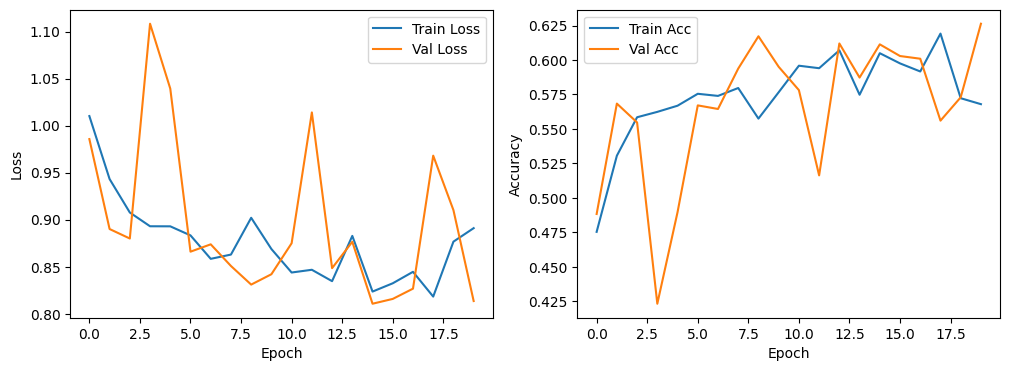

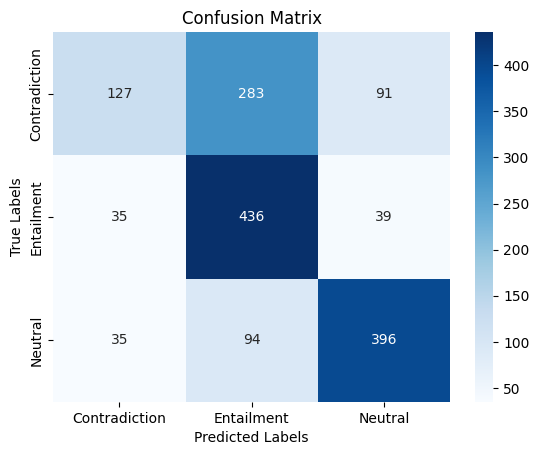

In [29]:
model_name = Pars_BERT_transformer()
optimizer= optim.Adam(model_name.parameters(),lr= 0.0001)
loss_fn = nn.CrossEntropyLoss()
name_plot = 'transformer_encoder'
model_finetune = finetune_transformer(20, dataloader, valid_dataloader, model_name, loss_fn, optimizer, device, name_plot)
accuracy, precision, recall, f1, cm = model_eval(model_finetune, test_dataloader, name_plot)

# Task 2

**Model**

In [30]:
class Pars_BERT(nn.Module):
    def __init__(self):
        super(Pars_BERT, self).__init__()
        self.bert_model = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
        self.linear1 = nn.Linear(768, 256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.out = nn.Linear(256, 3)
        
    def forward(self,ids,mask,token_type_ids):
        _,o2= self.bert_model(ids,attention_mask=mask,token_type_ids=token_type_ids, return_dict=False)
        out= self.linear1(o2)
        out= self.relu(out)
        out = self.dropout(out)
        out= self.out(out)
        
        return out


In [31]:
#12/0

In [32]:
model_task2=Pars_BERT()

loss_fn = nn.CrossEntropyLoss()

#Initialize Optimizer
optimizer= optim.Adam(model_task2.parameters(),lr= 0.0001)

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [33]:
for param in model_task2.bert_model.parameters():
    param.requires_grad = True

**Finetune**

In [34]:
from transformers.models.longformer import LongformerForSequenceClassification
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def finetune(epochs, dataloader,valid_dataloader, model_task2, loss_fn, optimizer, device, name_plot):
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []
    for epoch in range(epochs):
        loss_his = []
        acc_his = []
        print(f"Epoch {epoch+1}/{epochs}")
        # Training
        model_task2.to(device)    
        model_task2.train()
        loop = tqdm(enumerate(dataloader), leave=False, total=len(dataloader))
        for batch, dl in loop:
            ids = dl['ids'].to(device)
            token_type_ids = dl['token_type_ids'].to(device)
            mask = dl['mask'].to(device)
            label1 = dl['target'].to(device)
            label1 = label1.unsqueeze(1)
            
            optimizer.zero_grad()
            
            output = model_task2(ids=ids, mask=mask, token_type_ids=token_type_ids)

            label1 = label1.squeeze()      
            label = pd.get_dummies(label1.cpu())
            label = torch.from_numpy(label.values)
            label.to(device)
            label = label.type_as(output)

            
            loss = loss_fn(output, label)
            loss.backward()
            
            optimizer.step()
            
            pred = torch.argmax(output, dim=1)  # Get the predicted class labels
            
            num_correct = torch.sum(pred == label1).item()
            num_samples = pred.shape[0]
            accuracy = num_correct / num_samples
            
            #print(f'Got {num_correct} / {num_samples} with accuracy {accuracy*100:.2f}')
            
            # Show progress while training
            loop.set_description(f'Epoch={epoch}/{epochs}')
            loop.set_postfix(loss=loss.item(), acc=accuracy)
            loss_his.append(loss.item())
            acc_his.append(accuracy)

        Average_train_loss = Average(loss_his)
        Average_train_acc = Average(acc_his)
        train_loss_history.append(Average_train_loss)
        train_acc_history.append(Average_train_acc)        


        model_task2.eval()
        val_loss_his = []
        val_acc_his = []
        with torch.no_grad():
            val_loop = tqdm(enumerate(valid_dataloader), leave=False, total=len(valid_dataloader))
            for batch, dl in val_loop:
                ids = dl['ids'].to(device)
                token_type_ids = dl['token_type_ids'].to(device)
                mask = dl['mask'].to(device)
                label1 = dl['target'].to(device)
                label1 = label1.unsqueeze(1)
                
                optimizer.zero_grad()
                
                output = model_task2(ids=ids, mask=mask, token_type_ids=token_type_ids)
                label1 = label1.squeeze()      
                label = pd.get_dummies(label1.cpu())
                label = torch.from_numpy(label.values)
                label.to(device)
                label = label.type_as(output)
                
                loss = loss_fn(output, label)                
                pred = torch.argmax(output, dim=1)  # Get the predicted class labels

                
                num_correct = torch.sum(pred == label1).item()
                num_samples = pred.shape[0]
                accuracy = num_correct / num_samples
                                
                # Show progress while training
                loop.set_description(f'Epoch={epoch}/{epochs}')
                loop.set_postfix(loss=loss.item(), acc=accuracy)
                
                val_loss_his.append(loss.item())
                val_acc_his.append(accuracy)
            
        Average_val_loss = Average(val_loss_his)
        Average_val_acc = Average(val_acc_his)
        val_loss_history.append(Average_val_loss)
        val_acc_history.append(Average_val_acc)
        
        # Print train/validation loss and accuracy
        print(f'Train Loss: {Average_train_loss:.4f} | Train Acc: {Average_train_acc*100:.2f}%')
        print(f'Val Loss: {Average_val_loss:.4f} | Val Acc: {Average_val_acc*100:.2f}%')
    
    # Plot train/validation loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot train/validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Train Acc')
    plt.plot(val_acc_history, label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.savefig('training_plot_' + name_plot + '.png')  # Save the figure as a PNG file
    
    return model_task2

In [35]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


Epoch 1/5


  0%|          | 0/56 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train Loss: 0.8324 | Train Acc: 59.97%
Val Loss: 0.6692 | Val Acc: 71.29%
Epoch 2/5


Train Loss: 0.5559 | Train Acc: 77.58%
Val Loss: 0.5591 | Val Acc: 77.41%
Epoch 3/5


Train Loss: 0.3527 | Train Acc: 86.66%
Val Loss: 0.5501 | Val Acc: 80.14%
Epoch 4/5


Train Loss: 0.2254 | Train Acc: 92.01%
Val Loss: 0.6915 | Val Acc: 76.95%
Epoch 5/5


Train Loss: 0.1676 | Train Acc: 94.21%
Val Loss: 0.6994 | Val Acc: 77.54%


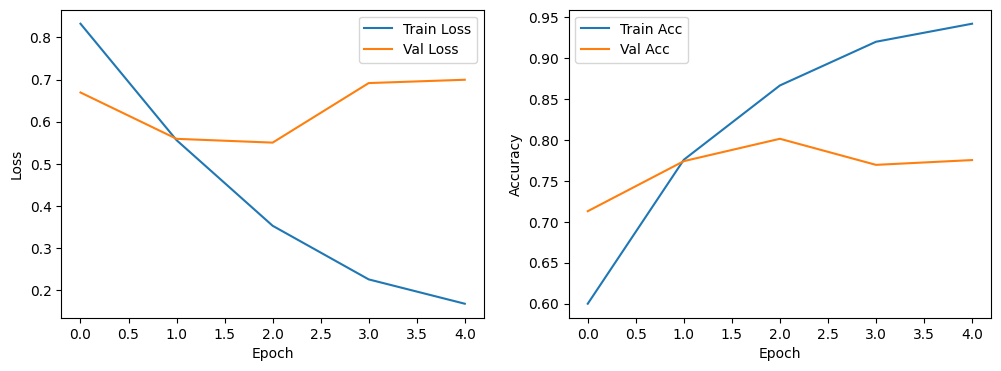

In [36]:
plot_name = '12_layer'
model_task2=finetune(5, dataloader, valid_dataloader, model_task2, loss_fn, optimizer, device, plot_name)


**Evaluation**

Test Accuracy: 79.56
Test Precision: 79.46
Test Recall: 79.38
Test F1-score: 79.25
Confusion Matrix:
[[350  70  81]
 [ 87 392  31]
 [ 39   6 480]]


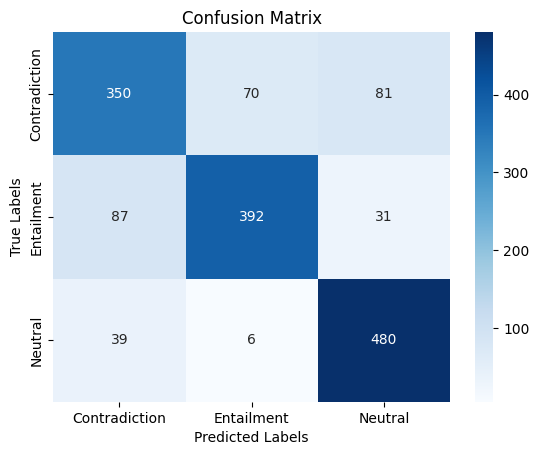

In [37]:

model_task2.eval()
test_loop = tqdm(enumerate(test_dataloader), leave=False, total=len(test_dataloader))
with torch.no_grad():
        all_labels = []
        all_preds = []
            
        for batch, dl in test_loop:
            ids = dl['ids'].to(device)
            token_type_ids = dl['token_type_ids'].to(device)
            mask = dl['mask'].to(device)
            label1 = dl['target'].to(device)
            label1 = label1.unsqueeze(1)
            
            output = model_task2(ids=ids, mask=mask, token_type_ids=token_type_ids)
            label1 = label1.squeeze()      
            label = pd.get_dummies(label1.cpu())
            label = torch.from_numpy(label.values)
            label = label.to(device)
            label = label.type_as(output)
            
            pred = torch.argmax(output, dim=1)
            label1 = label1.cpu().numpy()
            pred = pred.cpu().numpy()
            
            all_labels.extend(label1)
            all_preds.extend(pred)
            
        
    # Calculate metrics
cm = confusion_matrix(all_labels, all_preds)
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')
    
print(f'Test Accuracy: {accuracy*100:.2f}')
print(f'Test Precision: {precision*100:.2f}')
print(f'Test Recall: {recall*100:.2f}')
print(f'Test F1-score: {f1*100:.2f}')
print('Confusion Matrix:')
print(cm)

classes = ['Contradiction', 'Entailment', 'Neutral']

# Create a figure and axis
fig, ax = plt.subplots()

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.savefig('Confusion_Matrix_' + '12_layer' + '.png')# Show the plot
plt.show()

In [38]:
print(all_preds)

[0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 

In [39]:
model_task2

Pars_BERT(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [40]:
incorrect_samples = []
for true_label, predicted_label in zip(all_labels, all_preds):
    if true_label != predicted_label:
        incorrect_samples.append((true_label, predicted_label))

incorrect_samples = incorrect_samples[:5]

for true_label, predicted_label in incorrect_samples:
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("--------------------")

True Label: 2
Predicted Label: 0
--------------------
True Label: 2
Predicted Label: 0
--------------------
True Label: 0
Predicted Label: 2
--------------------
True Label: 1
Predicted Label: 0
--------------------
True Label: 1
Predicted Label: 2
--------------------


## Task 3

**Model**

In [41]:
class Pars_BERT_nlayers(nn.Module):
    def __init__(self, config_layers):
        super(Pars_BERT_nlayers, self).__init__()
        self.bert_model = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased", config = config_layers)
        self.linear1 = nn.Linear(768, 256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.out = nn.Linear(256, 3)
        
    def forward(self,ids,mask,token_type_ids):
        _,o2= self.bert_model(ids,attention_mask=mask,token_type_ids=token_type_ids, return_dict=False)
        out= self.linear1(o2)
        out= self.relu(out)
        out = self.dropout(out)
        out= self.out(out)
        
        return out

**Finetune**

In [42]:
def finetune_nlayer(epochs, train_dataloader, valid_dataloader, model, loss_fn, optimizer, device, name_plot):
    model.to(device)
    model.train()
    
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []
    
    for epoch in range(epochs):
        train_loss = []
        train_acc = []
        val_loss = []
        val_acc = []
        
        print(f"Epoch {epoch+1}/{epochs}")
        
        # Training
        model.train()
        train_loop = tqdm(enumerate(train_dataloader), leave=False, total=len(train_dataloader))
        for batch, dl in train_loop:
            ids = dl['ids'].to(device)
            token_type_ids = dl['token_type_ids'].to(device)
            mask = dl['mask'].to(device)
            label1 = dl['target'].to(device)
            label1 = label1.unsqueeze(1)
            
            optimizer.zero_grad()
            
            output = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
            label1 = label1.squeeze()
            label = pd.get_dummies(label1.cpu())
            label = torch.from_numpy(label.values)
            label.to(device)
            label = label.type_as(output)
            
            loss = loss_fn(output, label)
            loss.backward()
            optimizer.step()
            
            pred = torch.argmax(output, dim=1)
            num_correct = torch.sum(pred == label1).item()
            num_samples = pred.shape[0]
            accuracy = num_correct / num_samples
            
            train_loop.set_description(f'Epoch {epoch+1}/{epochs}')
            train_loop.set_postfix(loss=loss.item(), acc=accuracy)
            
            train_loss.append(loss.item())
            train_acc.append(accuracy)
        
        train_loss_history.append(np.mean(train_loss))
        train_acc_history.append(np.mean(train_acc))
        
        # Validation
        model.eval()
        val_loss = []
        val_acc = []
        with torch.no_grad():
            val_loop = tqdm(enumerate(valid_dataloader), leave=False, total=len(valid_dataloader))
            for batch, dl in val_loop:
                ids = dl['ids'].to(device)
                token_type_ids = dl['token_type_ids'].to(device)
                mask = dl['mask'].to(device)
                label1 = dl['target'].to(device)
                label1 = label1.unsqueeze(1)

                output = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
                label1 = label1.squeeze()
                label = pd.get_dummies(label1.cpu())
                label = torch.from_numpy(label.values)
                label.to(device)
                label = label.type_as(output)

                loss = loss_fn(output, label)
                pred = torch.argmax(output, dim=1)
                num_correct = torch.sum(pred == label1).item()
                num_samples = pred.shape[0]
                accuracy = num_correct / num_samples

                val_loop.set_description(f'Epoch {epoch+1}/{epochs}')
                val_loop.set_postfix(loss=loss.item(), acc=accuracy)

                val_loss.append(loss.item())
                val_acc.append(accuracy)
            
        val_loss_history.append(np.mean(val_loss))
        val_acc_history.append(np.mean(val_acc))
        
        # Print and plot train/validation loss and accuracy
        print(f'Train Loss: {train_loss_history[-1]:.4f} | Train Acc: {train_acc_history[-1]*100:.2f}%')
        print(f'Val Loss: {val_loss_history[-1]:.4f} | Val Acc: {val_acc_history[-1]*100:.2f}%')
    
    # Plot train/validation loss and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Train Acc')
    plt.plot(val_acc_history, label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.savefig('training_plot_' + name_plot + '.png')  # Save the figure as a PNG file
    
    return model

**Evaluation**

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np

def model_eval(model, test_dataloader, name_plot):
    model.eval()
    test_loop = tqdm(enumerate(test_dataloader), leave=False, total=len(test_dataloader))
    with torch.no_grad():
        all_labels = []
        all_preds = []
        
        for batch, dl in test_loop:
            ids = dl['ids'].to(device)
            token_type_ids = dl['token_type_ids'].to(device)
            mask = dl['mask'].to(device)
            label1 = dl['target'].to(device)
            label1 = label1.unsqueeze(1)
            
            output = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
            label1 = label1.squeeze()      
            label = pd.get_dummies(label1.cpu())
            label = torch.from_numpy(label.values)
            label = label.to(device)
            label = label.type_as(output)
            
            pred = torch.argmax(output, dim=1)
            label1 = label1.cpu().numpy()
            pred = pred.cpu().numpy()
            
            all_labels.extend(label1)
            all_preds.extend(pred)
    
    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    print(f'Test Accuracy: {accuracy*100:.2f}')
    print(f'Test Precision: {precision*100:.2f}')
    print(f'Test Recall: {recall*100:.2f}')
    print(f'Test F1-score: {f1*100:.2f}')
    print('Confusion Matrix:')
    print(cm)

    classes = ['Contradiction', 'Entailment', 'Neutral']
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create heatmap
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes, ax=ax)

    # Set axis labels and title
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    plt.savefig('Confusion_Matrix_' + name_plot + '.png')# Show the plot
    plt.show()
    return accuracy, precision, recall, f1, cm


In [44]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [45]:

loss_fn = nn.CrossEntropyLoss()
#Initialize Optimizer
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
cm_lst = []
num_layers_lst = []

In [46]:
for n in range(1,12):
    print(n)
    config_layer = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased",num_hidden_layers= 12-n)
    num_layers = config_layer.num_hidden_layers
    print('num_layers:', num_layers)
    model_name = Pars_BERT_nlayers(config_layer)
    optimizer= optim.Adam(model_name.parameters(),lr= 0.0001)
    name_plot = str(12-n) + '_layer'
    model_finetune = finetune_nlayer(5, dataloader, valid_dataloader, model_name, loss_fn, optimizer, device, name_plot)
    accuracy, precision, recall, f1, cm = model_eval(model_finetune, test_dataloader, name_plot)
    accuracy_lst.append(accuracy)
    precision_lst.append(precision)
    recall_lst.append(recall)
    f1_lst.append(f1)
    cm_lst.append(cm)
    num_layers_lst.append(num_layers)

1
num_layers: 11


Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['bert.encoder.layer.11.attention.self.key.bias', 'bert.encoder.layer.11.output.LayerNorm.weight', 'bert.encoder.layer.11.attention.output.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'bert.encoder.layer.11.output.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'bert.encoder.layer.11.attention.self.query.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'bert.encoder.layer.11.attention.self.query.bias', 'bert.encoder.layer.11.attention.output.LayerNorm.bias', 'bert.encoder.layer.11.attention.output.dense.bias', 'cls.predictions.transform.dense.weight', 'bert.encoder.layer.11.attention.output.LayerNorm.weight', 'bert.encoder.layer.11.output.dense.weight', 'cls.predictions.bias', 'bert.encoder.layer.11.intermediate.

Epoch 1/5


  0%|          | 0/56 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.plot(num_layers_lst, accuracy_lst, linestyle='-', marker='o', color='blue')
plt.xlabel("Number of Layers", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12, fontweight='bold')
plt.title("Accuracy vs. Number of Layers", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("accuracy_plot_layers.png", dpi=300, bbox_inches='tight')
plt.show()

# Task 4

**Model**

In [47]:
class Pars_BERT_prune_head(nn.Module):
    def __init__(self, drop_heads):
        super(Pars_BERT_prune_head, self).__init__()
        self.bert_model = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
        self.linear1 = nn.Linear(768, 256)
        self.relu = nn.ReLU()
        self.out = nn.Linear(256, 3)
        self.drop_heads = drop_heads
        
    def forward(self,ids,mask,token_type_ids):
        self.bert_model.prune_heads(self.drop_heads)
        _,o2= self.bert_model(ids,attention_mask=mask,token_type_ids=token_type_ids, return_dict=False)
        out= self.linear1(o2)
        out= self.relu(out)
        out= self.out(out)
        
        return out

In [48]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [49]:
#Initialize Optimizer
loss_fn = nn.CrossEntropyLoss()
#Initialize Optimizer
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []

ratio = [50,67,83]

In [50]:
import random

def generate_dictionary(num_values, percent):
    random.seed(5)
    dictionary = {}
    num_chosen = int((percent / 100) * num_values)
    for key in range(0, 12):
        values = random.sample(range(num_values), num_chosen)
        dictionary[key] = values

    return dictionary



In [51]:
drop_heads = generate_dictionary(12,50)
drop_heads

{0: [9, 4, 5, 8, 0, 6],
 1: [7, 3, 0, 2, 1, 8],
 2: [7, 3, 6, 8, 1, 4],
 3: [3, 0, 11, 6, 4, 1],
 4: [6, 2, 1, 10, 7, 9],
 5: [2, 0, 10, 3, 8, 1],
 6: [2, 4, 5, 3, 8, 1],
 7: [11, 3, 6, 4, 0, 2],
 8: [6, 2, 10, 4, 1, 9],
 9: [4, 9, 10, 0, 5, 8],
 10: [4, 5, 11, 7, 10, 1],
 11: [7, 11, 2, 0, 4, 8]}

In [52]:
model=Pars_BERT()
config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
num_heads = config.num_attention_heads
print('num-heads: ', num_heads)

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


num-heads:  12


In [53]:
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

163038979


In [54]:
model = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [55]:
model.prune_heads(drop_heads)
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

148671744


In [56]:
drop_heads = generate_dictionary(12,83)
model.prune_heads(drop_heads)
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

139225344


In [57]:
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
cm_lst = []

**Train**

50


Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5


Train Loss: 0.8355 | Train Acc: 58.79%
Val Loss: 0.7483 | Val Acc: 63.09%
Epoch 2/5


Train Loss: 0.5835 | Train Acc: 73.54%
Val Loss: 0.7764 | Val Acc: 70.31%
Epoch 3/5


Train Loss: 0.4315 | Train Acc: 82.11%
Val Loss: 0.6852 | Val Acc: 72.85%
Epoch 4/5


Train Loss: 0.2942 | Train Acc: 88.87%
Val Loss: 0.6128 | Val Acc: 76.76%
Epoch 5/5


Train Loss: 0.2215 | Train Acc: 92.02%
Val Loss: 0.8350 | Val Acc: 72.85%


Test Accuracy: 73.11
Test Precision: 75.23
Test Recall: 72.96
Test F1-score: 72.80
Confusion Matrix:
[[365  42  94]
 [173 296  41]
 [ 63   0 462]]


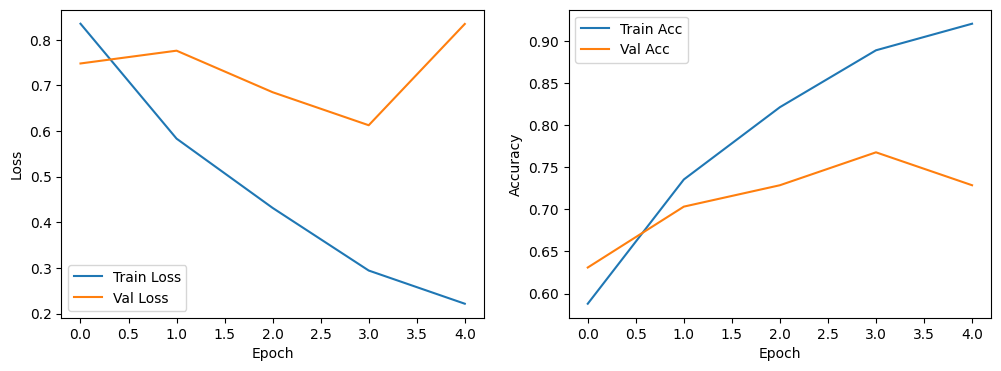

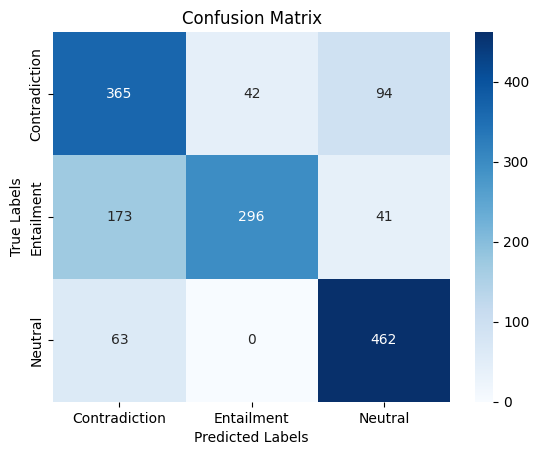

67


Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5


  0%|          | 0/56 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train Loss: 0.9500 | Train Acc: 51.10%
Val Loss: 0.7869 | Val Acc: 62.89%
Epoch 2/5


Train Loss: 0.6799 | Train Acc: 67.82%
Val Loss: 0.6766 | Val Acc: 70.51%
Epoch 3/5


Train Loss: 0.4915 | Train Acc: 78.28%
Val Loss: 0.9498 | Val Acc: 62.11%
Epoch 4/5


Train Loss: 0.3743 | Train Acc: 84.61%
Val Loss: 0.7322 | Val Acc: 72.72%
Epoch 5/5


Train Loss: 0.3348 | Train Acc: 86.80%
Val Loss: 1.2116 | Val Acc: 63.80%


Test Accuracy: 68.23
Test Precision: 70.94
Test Recall: 67.85
Test F1-score: 66.82
Confusion Matrix:
[[266  40 195]
 [154 270  86]
 [ 11   2 512]]


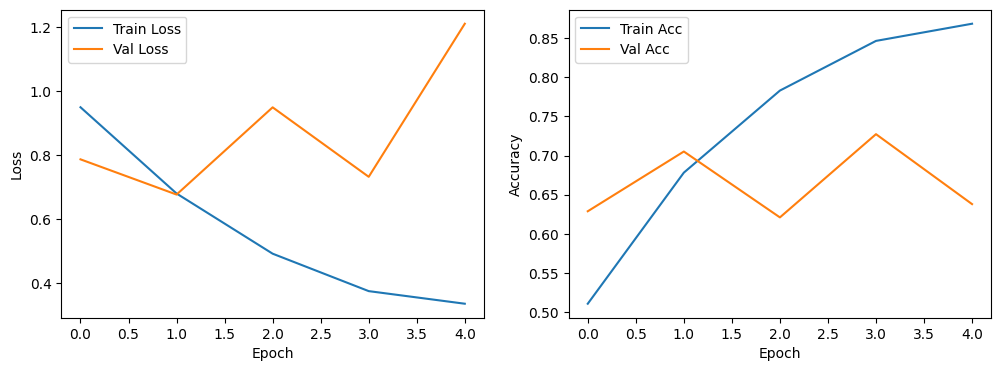

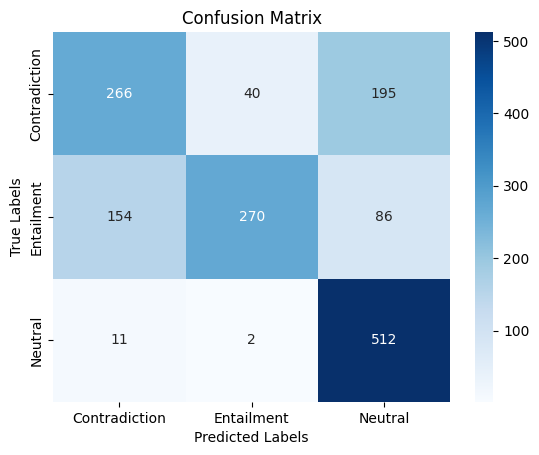

83


Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5


  0%|          | 0/56 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train Loss: 1.0783 | Train Acc: 39.80%
Val Loss: 1.0373 | Val Acc: 46.29%
Epoch 2/5


Train Loss: 0.9281 | Train Acc: 54.55%
Val Loss: 1.0192 | Val Acc: 49.80%
Epoch 3/5


Train Loss: 0.7276 | Train Acc: 68.19%
Val Loss: 1.1525 | Val Acc: 47.27%
Epoch 4/5


Train Loss: 0.5486 | Train Acc: 76.93%
Val Loss: 1.2876 | Val Acc: 48.24%
Epoch 5/5


Train Loss: 0.4561 | Train Acc: 80.69%
Val Loss: 1.3819 | Val Acc: 50.59%


Test Accuracy: 50.33
Test Precision: 50.48
Test Recall: 50.34
Test F1-score: 50.01
Confusion Matrix:
[[292 102 107]
 [190 199 121]
 [139 104 282]]


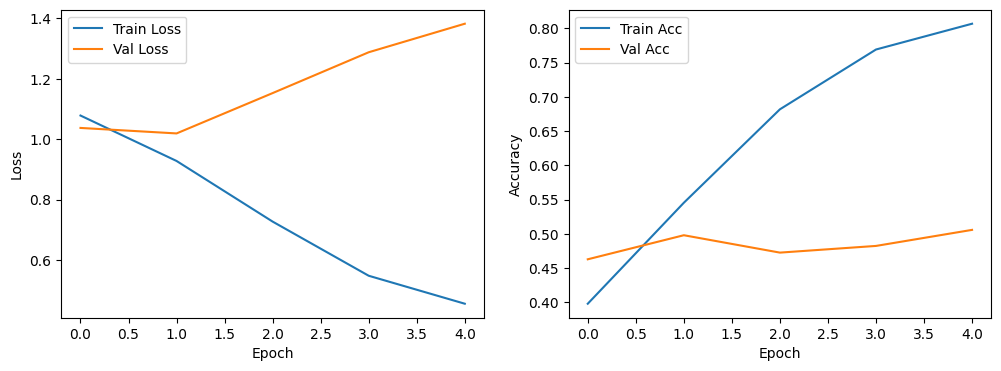

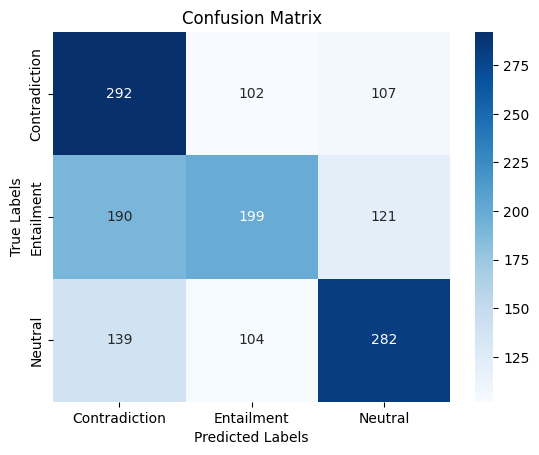

In [58]:
for r in ratio:
    print(r)
    drop_heads = generate_dictionary(12,r)
    model_name = Pars_BERT_prune_head(drop_heads)
    optimizer= optim.Adam(model_name.parameters(),lr= 0.0001)
    name_plot = str(r) + '_drop_head'
    model_finetune = finetune_nlayer(5, dataloader, valid_dataloader, model_name, loss_fn, optimizer, device, name_plot)
    accuracy, precision, recall, f1, cm = model_eval(model_finetune, test_dataloader, name_plot)
    accuracy_lst.append(accuracy)
    precision_lst.append(precision)
    recall_lst.append(recall)
    f1_lst.append(f1)
    cm_lst.append(cm)

## Task 5

In [59]:
import pandas as pd

# Create the sentence pairs
data = {
    'premise': [
        "دین او سنی است.",
        "آن شخص سیاه پوست بهترین گزینه برای مدیرعاملی هست.",
        "اصلیت او تهرانی است.",
        "شغل آن زن منشی بودن شرکت است."
        "از بین آن ها فقط علی ماند."

    ],
    'hypothesis': [
        "مذهب او شیعه است.",
        "آن شخص سفید پوست بهترین گزینه برای مدیرعاملی است.",
        "اصلیت او آبادانی است.",
        "شغل آن زن مدیرعاملی شرکت است."
        "همه رفتند ولی علی ماند."

    ],
    'label': [
        1,  #e
        1,
        1,
        1
    ]
}

# Convert the data to a DataFrame
df_sample = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_sample.to_csv('nli_dataset.csv', sep='\t', index=False)  # Modify 'nli_dataset.csv' to the desired file name


In [60]:
df_sample

,premise,hypothesis,label
0,دین او سنی است.,مذهب او شیعه است.,1
1,آن شخص سیاه پوست بهترین گزینه برای مدیرعاملی هست.,آن شخص سفید پوست بهترین گزینه برای مدیرعاملی است.,1
2,اصلیت او تهرانی است.,اصلیت او آبادانی است.,1
3,شغل آن زن منشی بودن شرکت است.از بین آن ها فقط ...,شغل آن زن مدیرعاملی شرکت است.همه رفتند ولی علی...,1


In [63]:
t = ParsBertDataset(df_sample, tokenizer, max_length=100)  # Assuming 'tokenizer' is already defined

# Create the DataLoader
sampleloader = DataLoader(dataset=t, batch_size=1, drop_last=True)

In [64]:
model.eval()
test_loop = tqdm(enumerate(sampleloader), leave=False, total=len(test_dataloader))
with torch.no_grad():
    all_labels = []
    all_preds = []
    
    for batch, dl in sampleloader:
        ids = dl['ids'].to(device)
        token_type_ids = dl['token_type_ids'].to(device)
        mask = dl['mask'].to(device)
        label1 = dl['target'].to(device)
        label1 = label1.unsqueeze(1)
        
        output = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
        label1 = label1.squeeze()      
        label = pd.get_dummies(label1.cpu())
        label = torch.from_numpy(label.values)
        label = label.to(device)
        label = label.type_as(output)
        
        pred = torch.argmax(output, dim=1)
        label1 = label1.cpu().numpy()
        pred = pred.cpu().numpy()
        print('preds: ',preds)


  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


ValueError: ignored